# ロトカ・ヴォルテラ方程式

## ロトカ・ヴォルテラ方程式
捕食者と被食者の異なる役割の生物の個体数変動を表した数理モデル．

$$
    被食者の個体数変化 = 捕食がない場合の増加 - 捕食による減少 \\
    捕食者の個体数変化 = -捕食がない場合の減少 + 捕食による増加
$$

と考えれば，以下の式を立てることができる．

$$
\begin{equation*}
\left\{
    \begin{array}{1}
        \frac{dx}{dt} = x(r-ay) \\
        \frac{dy}{dt} = y(-s+bx)
    \end{array}
\right.
\end{equation*}
$$
ただし
$x$は被食者の個体数，$y$は捕食者の個体数を表し，$a, b, r, s$は正のパラメータである．
$$
    a: 捕食率 \\
    b: 捕食者が被食者を食べたことで増やす率 \\
    r: 被食者の出生率 \\
    s: 捕食者の出生率
$$
ここでは数値シミュレーションをして，被食者と捕食者の個体数の変動を時間変化でみるグラフを作成する．


以下，必要な式を載せる．
まずは被食者，捕食者の個体数の変化速度である．
$$
\left\{
    \begin{array}{1}
        v_x = \frac{dx}{dt} = x(r-ay) \\
        v_y = \frac{dy}{dt} = y(-s+bx)
    \end{array}
\right.
$$

次に微小時間$\Delta{t}$後の個体数を示す．
$$
    \hat{x} = x + v_x \Delta{t} \\
    \hat{y} = y + v_y \Delta{t}
$$

まずは一度，順番に式を立てて，ロトカ・ヴォルテラ方程式を考える．
そしてその後，様々なパラメータを変更したいので，グラフまでを描くことが出来る関数を作成する．

In [71]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
sns.set_style('darkgrid')

In [16]:
def LotkaVolterraEquation(x, y, a=1, b=2, r=3, s=4, dt=10**(-5)):
    """
    @param
    x: number of prey
    y: number of predator
    a, b, r, s: parameter
    dt: infinitesimal time
    """
    vx = x * (r - a*y)
    vy = y * (-s + b*x)
    x_new = x + vx*dt
    y_new = y + vy*dt
    return [x_new, y_new]

In [19]:
# initial conditions
x_start = 10
y_start = 2
t_start = 0

x_change = [x_start]
y_change = [y_start]
t_change = [t_start]

In [20]:
# start simulation
for i in range(10**6):
    x_new, y_new = LotkaVolterraEquation(
                            x = x_change[-1],
                            y = y_change[-1])
    t_new = t_change[-1] + dt 
    x_change.append(x_new)
    y_change.append(y_new)
    t_change.append(t_new)

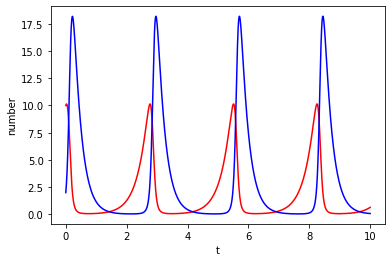

In [28]:
# draw the graph
fig, ax = plt.subplots()
cx = "red"
cy = "blue"
ax.set_xlabel('t')
ax.set_ylabel('number')
ax.plot(t_change, x_change, color=cx)
ax.plot(t_change, y_change, color=cy)

plt.show()

以上のことを一つの関数にまとめる．

In [52]:
# one simulation
def LotkaVolterraEquation(x, y, a=1, b=2, r=3, s=4, dt=10**(-5)):
    """
    @param
    x: number of pery
    y: number of predator
    a, b, r, s: parameter
    dt: infinitesimal time
    """
    vx = x * (r - a*y)
    vy = y * (-s + b*x)
    x_new = x + vx*dt
    y_new = y + vy*dt
    return [x_new, y_new]

def DrawGraph_LVmodel(xs, ys, a, b, r, s, time = 10):
    # time
    dt = 10**(-4)
    count = int(time/dt)
    # data for result
    x_change = [xs]
    y_change = [ys]
    t_change = [0]
    # start simulation
    for i in range(count):
        x_new, y_new = LotkaVolterraEquation(
                                x = x_change[-1],
                                y = y_change[-1],
                                a=a, b=b, r=r, s=s,dt=dt)
        t_new = t_change[-1] + dt 
        x_change.append(x_new)
        y_change.append(y_new)
        t_change.append(t_new)

    # darw graph
    fig, ax = plt.subplots()
    cx = "red"
    cy = "blue"
    ax.set_xlabel('t')
    ax.set_ylabel('number')
    ax.plot(t_change, x_change, color=cx, label='prey')
    ax.plot(t_change, y_change, color=cy, label='predator')
    ax.legend()
    plt.show()

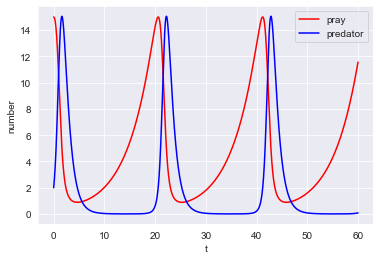

In [74]:
DrawGraph_LVmodel(xs=15, ys=2, 
                  a=0.1, b=0.2, r=0.2, s=1,
                  time = 60)